# Soal no 3
Adam Muhammad Irsyad Rifat<p>
1301174260<p>
IOT DENGAN KEMAMPUAN CERDAS IF-42-GAB03 [VMD]

In [397]:
from matplotlib import pyplot as plt #import plt dari matplotlib untuk plot data
from pandas import read_excel #import pandas untuk read data dari excel hasil phypox
import math #untuk penghitungan matematis
import pandas as pd
import numpy as np
from scipy.signal import butter, lfilter, freqz, find_peaks #untuk LPF, dan mencari titik puncak

In [398]:
data_accel = read_excel('data11.xls','Linear Acceleration', header=0)
data_accel.head()
# pemindahan data excel ke variable program dengan menggunakan pandas

,Time (s),Linear Acceleration x (m/s^2),Linear Acceleration y (m/s^2),Linear Acceleration z (m/s^2)
0,0.066060,-0.025552,0.000000,-2.555177e-02
1,0.080670,-0.019164,-0.057491,9.581894e-03
2,0.095278,-0.045993,-0.045993,3.832766e-02
3,0.109887,-0.006388,-0.038328,-2.980232e-08
4,0.124495,0.027947,-0.033537,6.707337e-02


In [404]:
def plotdataaccel(tab,ax): #fungsi untuk plotting data accelerometer dengan input table data dan axis(sumbu) nya
  time= []
  axtab = []
  sumbu = 'sumbu-x'
  if (ax==2):
    sumbu = 'sumbu-y'
  if (ax==3):
    sumbu = 'sumbu-z'
  if (ax==4):
    sumbu = 'absolut' #penentuan sumbu berdasarkan kolom pada tabel data
  for i in range(len(tab.values)): #merubah kolom dari tabel data pandas ke array agar dapat di plot
    time.append(tab.values[i][0])
  for i in range(len(tab.values)):
    axtab.append(tab.values[i][ax])
  plt.plot(time, axtab, 'g-') #plot berdasarkan data yang ada
  plt.xlim([0, 60])
  plt.grid()
  plt.xlabel('time(s)')
  plt.xlabel('percepatan '+sumbu+'(m/s^2)')

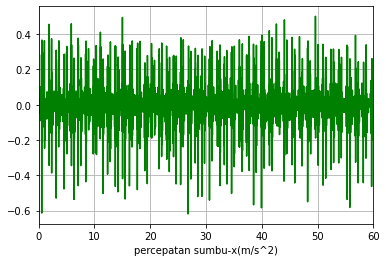

In [405]:
 plotdataaccel(data_accel,1) #plot kolom 1 yang merupakan sumbu x

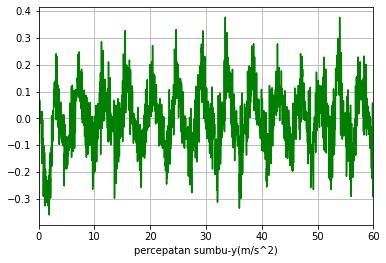

In [406]:
 plotdataaccel(data_accel,2) #plot kolom 2 yang merupakan sumbu y

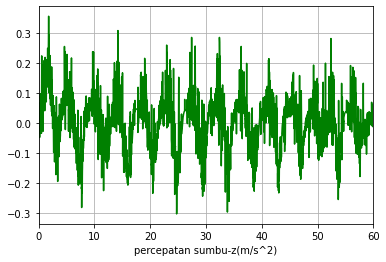

In [407]:
 plotdataaccel(data_accel,3) #plot kolom 3 yang merupakan sumbu z

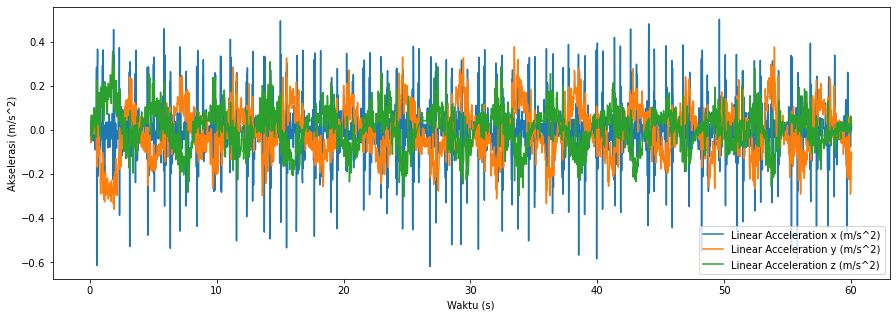

In [403]:
data_accel.plot(x='Time (s)', figsize=(15,5), alpha=1)
plt.xlabel("Waktu (s)")
plt.ylabel("Akselerasi (m/s^2)")
plt.show()

# Soal no 4

In [416]:
sudut_accrho_xy = np.arctan(data_accel['Linear Acceleration x (m/s^2)'] / (np.sqrt(data_accel['Linear Acceleration y (m/s^2)'] ** 2 + data_accel['Linear Acceleration y (m/s^2)'] ** 2)))
sudut_accrho_xz = np.arctan(data_accel['Linear Acceleration x (m/s^2)'] / (np.sqrt(data_accel['Linear Acceleration z (m/s^2)'] ** 2 + data_accel['Linear Acceleration z (m/s^2)'] ** 2)))
sudut_accrho_yz = np.arctan(data_accel['Linear Acceleration y (m/s^2)'] / (np.sqrt(data_accel['Linear Acceleration z (m/s^2)'] ** 2 + data_accel['Linear Acceleration z (m/s^2)'] ** 2)))
waktu = data_accel['Time (s)']

inklinasi = {'Time (s)' : waktu, 'sudut_accrho_xy' : sudut_accrho_xy, 'sudut_accrho_xz' : sudut_accrho_xz, 'sudut_accrho_yz' : sudut_accrho_yz}
df_inklinasi = pd.DataFrame(inklinasi)
#df_inklinasi.head()

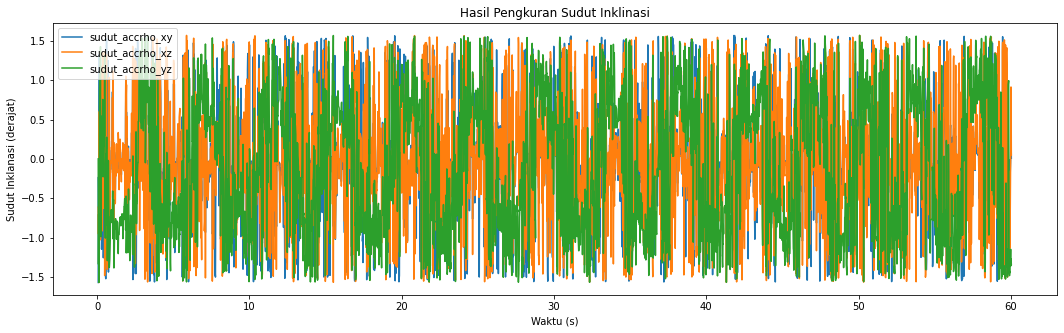

In [418]:
df_inklinasi.plot(x='Time (s)', figsize=(18,5), alpha=1)
plt.title("Hasil Pengkuran Sudut Inklinasi")
plt.xlabel("Waktu (s)")
plt.ylabel("Sudut Inklanasi (derajat)")
plt.show()

# Soal no 5

In [419]:
def butter_lowpass(cutoff, fs, order=5): 
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

# Persyaratan Filter
order = 5
fs = 100 #sample rate per data
cutoff = 0.8  # Frekuensi yang akan dipotong seperti pada soal

LPF untuk Metode 1 (Nomor 3)

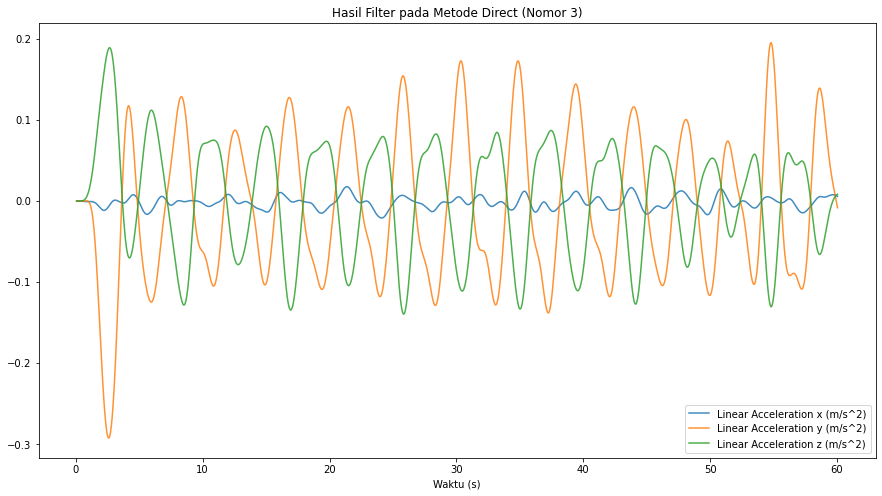

In [420]:
lpf1_x = butter_lowpass_filter(data_accel['Linear Acceleration x (m/s^2)'], cutoff, fs, order)
lpf1_y = butter_lowpass_filter(data_accel['Linear Acceleration y (m/s^2)'], cutoff, fs, order)
lpf1_z = butter_lowpass_filter(data_accel['Linear Acceleration z (m/s^2)'], cutoff, fs, order)
t = data_accel['Time (s)']

filter_metode1 = {'Time (s)' : t, 'Linear Acceleration x (m/s^2)' : lpf1_x, 'Linear Acceleration y (m/s^2)' : lpf1_y, 'Linear Acceleration z (m/s^2)' : lpf1_z}
df_filter_metode1 = pd.DataFrame(filter_metode1)
#df_filter_metode1.head()

df_filter_metode1.plot(x='Time (s)', figsize=(15,8), alpha=0.85)
plt.title("Hasil Filter pada Metode Direct (Nomor 3)")
plt.xlabel("Waktu (s)")
plt.show()

LPF untuk Metode 2 (Nomor 4)

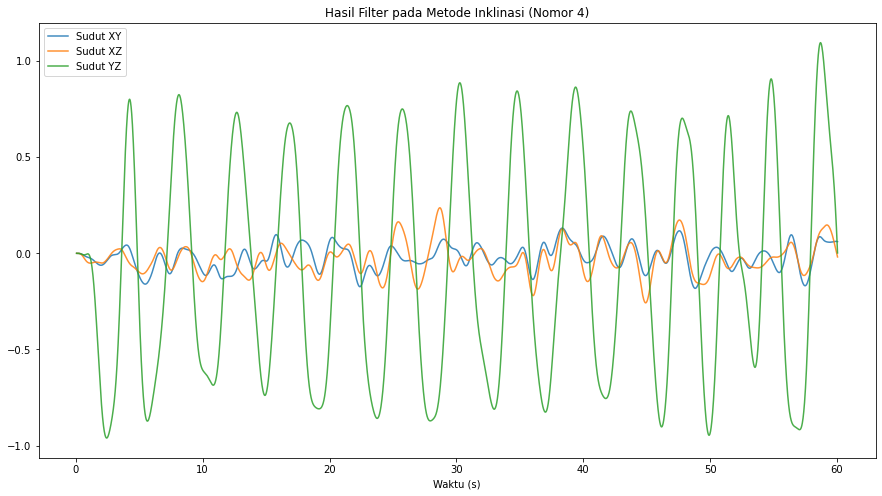

In [421]:
# Filter data
lpf2_xy = butter_lowpass_filter(df_inklinasi['sudut_accrho_xy'], cutoff, fs, order)
lpf2_xz = butter_lowpass_filter(df_inklinasi['sudut_accrho_xz'], cutoff, fs, order)
lpf2_yz = butter_lowpass_filter(df_inklinasi['sudut_accrho_yz'], cutoff, fs, order)
t = data_accel['Time (s)']

filter_metode2 = {'Time' : t, 'Sudut XY' : lpf2_xy, 'Sudut XZ' : lpf2_xz, 'Sudut YZ' : lpf2_yz}
df_filter_metode2 = pd.DataFrame(filter_metode2)
#df_filter_metode2.head()

df_filter_metode2.plot(x='Time', figsize=(15,8), alpha=0.85)
plt.title("Hasil Filter pada Metode Inklinasi (Nomor 4)")
plt.xlabel("Waktu (s)")

plt.show()

In [382]:
peaks_x,_ = find_peaks(df_filter_metode1['Linear Acceleration x (m/s^2)'])
peaks_y,_ = find_peaks(df_filter_metode1['Linear Acceleration y (m/s^2)'])
peaks_z,_ = find_peaks(df_filter_metode1['Linear Acceleration z (m/s^2)'])
peaks_xy,_ = find_peaks(df_filter_metode2['Sudut XY'])
peaks_xz,_ = find_peaks(df_filter_metode2['Sudut XZ'])
peaks_yz,_ = find_peaks(df_filter_metode2['Sudut YZ'])
print("TITIK PUNCAK METODE DIRECT\n")
print('Titik puncak Sumbu X\n', peaks_x)
print('Titik puncak Sumbu Y\n', peaks_y)
print('Titik puncak Sumbu Z\n', peaks_z)
print("\n\nTITIK PUNCAK METODE INKLINASI\n")
print('Titik puncak Sudut XY\n', peaks_xy)
print('\nTitik puncak Sudut XZ\n', peaks_xz)
print('\nTitik puncak Sudut YZ\n', peaks_yz)

TITIK PUNCAK METODE DIRECT

Titik puncak Sumbu X
 [  69  208  306  460  552  618  818  911 1099 1202 1458 1563 1757 1982
 2060 2177 2288 2416 2521 2694 2812 2992 3136 3262 3475 3596 3728 3845
 4013 4081]
Titik puncak Sumbu Y
 [  53  281  565  855 1147 1465 1761 2073 2381 2693 3006 3287 3513 3746
 3868 4008]
Titik puncak Sumbu Z
 [ 178  404  739 1025 1348 1652 1939 2188 2268 2560 2890 3125 3429 3657
 3840 3913]


TITIK PUNCAK METODE INKLINASI

Titik puncak Sudut XY
 [ 269  448  570  741  821  906 1007 1077 1216 1379 1580 1698 1796 1979
 2160 2288 2406 2521 2620 2841 2995 3132 3252 3452 3587 3708 3856 4010
 4097]

Titik puncak Sudut XZ
 [ 104  232  450  589  749  826  993 1103 1251 1370 1466 1582 1735 1959
 2080 2180 2408 2519 2620 2689 2831 2989 3137 3252 3464 3578 3761 3854
 4048]

Titik puncak Sudut YZ
 [  60  286  552  864 1150 1460 1757 2067 2376 2692 2990 3267 3515 3747
 4013]


In [383]:
print("Pada Nomor 3, banyaknya puncak = ")
print(len(peaks_x), " pada sumbu X")
print(len(peaks_y), " pada sumbu Y")
print(len(peaks_z), " pada sumbu Z")

print("\nPada Nomor 4, banyaknya puncak = ")
print(len(peaks_xy), " pada sudut XY")
print(len(peaks_xz), " pada sudut XZ")
print(len(peaks_yz), " pada sudut YZ")

Pada Nomor 3, banyaknya puncak = 
30  pada sumbu X
16  pada sumbu Y
16  pada sumbu Z

Pada Nomor 4, banyaknya puncak = 
29  pada sudut XY
29  pada sudut XZ
15  pada sudut YZ


Jika dihitung manual, jumlah pernafasan per menit sebanyak 14.

Untuk cara nomor 3 (direct method) memiliki rata-rata 20.66

Untuk cara nomor 4 (inklinasi) memiliki rata-rata 24.33


Metode yang lebih baik adalah metode direct karena lebih mendekati nilai aktualnya